In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [81]:
data=pd.read_csv(r"C:\Users\hp\Downloads\fake_real_job_postings_3000x25.csv")
data

,job_id,job_title,job_description,requirements,benefits,company_name,company_profile,industry,employment_type,location,...,application_deadline,contact_email,company_website,has_logo,num_open_positions,job_function,telecommuting,fraud_reason,text_length,is_fake
0,1,Software Engineer,We are looking for responsibilities fast-paced...,Candidates should have dynamic team skills fas...,We offer required skills fast-paced skills req...,Company_543,Our company growth fast-paced responsibilities...,Marketing,Contract,"Toronto, Canada",...,2024-09-16,hr312@company.com,https://www.company.com,0,3,Management,0,NaN,89,0
1,2,Content Writer,We are looking for required support experience...,Candidates should have required team fast-pace...,We offer fast-paced dynamic dynamic strategy g...,Company_192,Our company fast-paced opportunity innovation ...,Finance,Full-time,"Toronto, Canada",...,2024-10-18,hr127@company.com,https://www.company.com,0,10,Development,1,NaN,89,0
2,3,Customer Support Specialist,We are looking for dynamic required fast-paced...,Candidates should have preferred knowledge opp...,We offer skills experience required growth res...,NaN,We are global innovation growth skills knowled...,Healthcare,Internship,Remote,...,2024-01-13,job92@gmail.com,NaN,0,6,Support,0,Suspicious email,69,1
3,4,Data Analyst,We are looking for collaboration skills suppor...,Candidates should have innovation team require...,We offer strategy strategy dynamic support opp...,Company_95,Our company fast-paced support team strategy i...,Healthcare,Part-time,"Berlin, Germany",...,2024-02-09,hr366@company.com,https://www.company.com,1,4,Management,1,NaN,89,0
4,5,Graphic Designer,We are looking for team growth growth fast-pac...,Candidates should have experience preferred kn...,We offer opportunity skills responsibilities c...,NaN,We are global experience skills preferred fast...,Retail,Part-time,"London, UK",...,2024-08-26,job359@gmail.com,NaN,0,5,Management,0,No salary info,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,HR Coordinator,We are looking for required team responsibilit...,Candidates should have development fast-paced ...,We offer support strategy knowledge growth str...,Company_159,Our company growth required innovation collabo...,Finance,Temporary,"Berlin, Germany",...,2024-10-15,hr240@company.com,https://www.company.com,0,8,Analysis,1,NaN,89,0
2996,2997,Content Writer,We are looking for opportunity innovation requ...,Candidates should have preferred skills collab...,We offer experience team dynamic opportunity e...,NaN,We are global experience knowledge knowledge d...,Marketing,Full-time,"London, UK",...,2024-02-21,job171@gmail.com,NaN,0,7,Development,0,Suspicious email,69,1
2997,2998,Product Manager,We are looking for responsibilities growth dyn...,Candidates should have experience strategy kno...,We offer support team collaboration growth sup...,NaN,We are global dynamic innovation strategy grow...,IT,Contract,"London, UK",...,2024-02-13,job419@gmail.com,NaN,0,1,Development,1,No salary info,69,1
2998,2999,Business Analyst,We are looking for required dynamic support dy...,Candidates should have collaboration developme...,We offer preferred fast-paced development deve...,NaN,We are global required growth opportunity dyna...,Healthcare,Contract,"Toronto, Canada",...,2024-11-25,job274@gmail.com,NaN,0,5,Development,1,Unverified company,69,1


In [82]:
data.shape

(3000, 25)

In [83]:
data.columns

Index(['job_id', 'job_title', 'job_description', 'requirements', 'benefits',
       'company_name', 'company_profile', 'industry', 'employment_type',
       'location', 'salary_range', 'required_experience_years',
       'education_level', 'department', 'posting_date', 'application_deadline',
       'contact_email', 'company_website', 'has_logo', 'num_open_positions',
       'job_function', 'telecommuting', 'fraud_reason', 'text_length',
       'is_fake'],
      dtype='object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   job_id                     3000 non-null   int64 
 1   job_title                  3000 non-null   object
 2   job_description            3000 non-null   object
 3   requirements               3000 non-null   object
 4   benefits                   3000 non-null   object
 5   company_name               1528 non-null   object
 6   company_profile            3000 non-null   object
 7   industry                   3000 non-null   object
 8   employment_type            3000 non-null   object
 9   location                   3000 non-null   object
 10  salary_range               3000 non-null   object
 11  required_experience_years  3000 non-null   int64 
 12  education_level            3000 non-null   object
 13  department                 3000 non-null   object
 14  posting_

In [85]:
data.head()

,job_id,job_title,job_description,requirements,benefits,company_name,company_profile,industry,employment_type,location,...,application_deadline,contact_email,company_website,has_logo,num_open_positions,job_function,telecommuting,fraud_reason,text_length,is_fake
0,1,Software Engineer,We are looking for responsibilities fast-paced...,Candidates should have dynamic team skills fas...,We offer required skills fast-paced skills req...,Company_543,Our company growth fast-paced responsibilities...,Marketing,Contract,"Toronto, Canada",...,2024-09-16,hr312@company.com,https://www.company.com,0,3,Management,0,NaN,89,0
1,2,Content Writer,We are looking for required support experience...,Candidates should have required team fast-pace...,We offer fast-paced dynamic dynamic strategy g...,Company_192,Our company fast-paced opportunity innovation ...,Finance,Full-time,"Toronto, Canada",...,2024-10-18,hr127@company.com,https://www.company.com,0,10,Development,1,NaN,89,0
2,3,Customer Support Specialist,We are looking for dynamic required fast-paced...,Candidates should have preferred knowledge opp...,We offer skills experience required growth res...,NaN,We are global innovation growth skills knowled...,Healthcare,Internship,Remote,...,2024-01-13,job92@gmail.com,NaN,0,6,Support,0,Suspicious email,69,1
3,4,Data Analyst,We are looking for collaboration skills suppor...,Candidates should have innovation team require...,We offer strategy strategy dynamic support opp...,Company_95,Our company fast-paced support team strategy i...,Healthcare,Part-time,"Berlin, Germany",...,2024-02-09,hr366@company.com,https://www.company.com,1,4,Management,1,NaN,89,0
4,5,Graphic Designer,We are looking for team growth growth fast-pac...,Candidates should have experience preferred kn...,We offer opportunity skills responsibilities c...,NaN,We are global experience skills preferred fast...,Retail,Part-time,"London, UK",...,2024-08-26,job359@gmail.com,NaN,0,5,Management,0,No salary info,69,1


In [86]:
data.isna().sum()

job_id                          0
job_title                       0
job_description                 0
requirements                    0
benefits                        0
company_name                 1472
company_profile                 0
industry                        0
employment_type                 0
location                        0
salary_range                    0
required_experience_years       0
education_level                 0
department                      0
posting_date                    0
application_deadline            0
contact_email                   0
company_website              1472
has_logo                        0
num_open_positions              0
job_function                    0
telecommuting                   0
fraud_reason                 1528
text_length                     0
is_fake                         0
dtype: int64

In [87]:
data.duplicated().any()

np.False_

In [88]:
# to remove the null values
# Fill categorical (text) columns with 'Unknown'
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")

# Fill numerical columns with median
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Verify no null values remain
print(data.isnull().sum())

# Save cleaned dataset
data.to_csv("cleaned_job_postings.csv", index=False)


job_id                       0
job_title                    0
job_description              0
requirements                 0
benefits                     0
company_name                 0
company_profile              0
industry                     0
employment_type              0
location                     0
salary_range                 0
required_experience_years    0
education_level              0
department                   0
posting_date                 0
application_deadline         0
contact_email                0
company_website              0
has_logo                     0
num_open_positions           0
job_function                 0
telecommuting                0
fraud_reason                 0
text_length                  0
is_fake                      0
dtype: int64


# Data Visualization

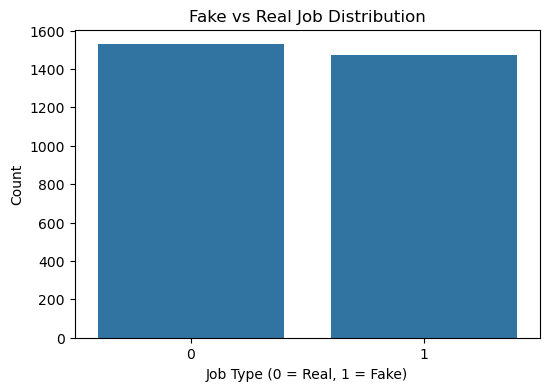

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_fake', data=df)
plt.title("Fake vs Real Job Distribution")
plt.xlabel("Job Type (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()

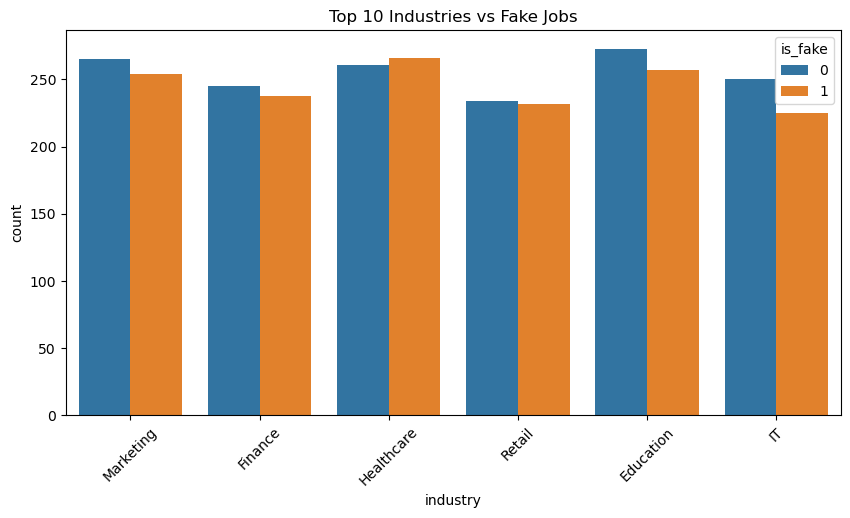

In [93]:
top_industries = df['industry'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.countplot(x='industry', hue='is_fake',
              data=df[df['industry'].isin(top_industries)])
plt.title("Top 10 Industries vs Fake Jobs")
plt.xticks(rotation=45)
plt.show()

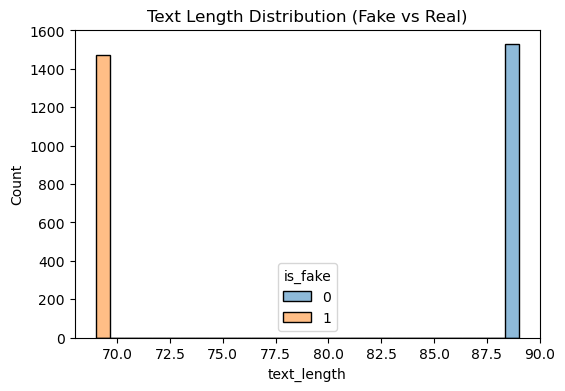

In [94]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='text_length', hue='is_fake', bins=30, kde=True)
plt.title("Text Length Distribution (Fake vs Real)")
plt.show()

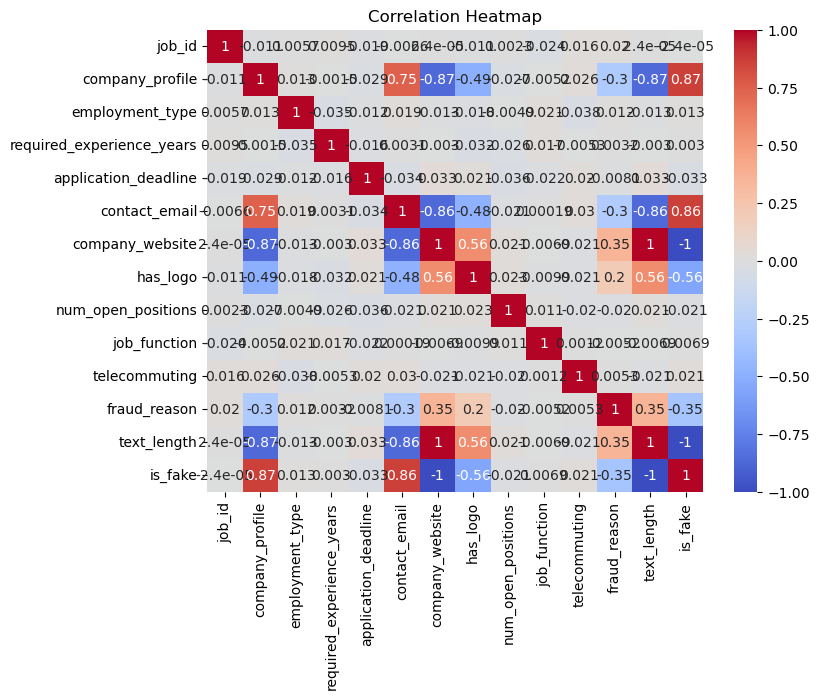

In [96]:
plt.figure(figsize=(8,6))
num_df = df.select_dtypes(include=['int64','float64'])
corr = num_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Data preprocessing

In [97]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le10 = LabelEncoder()
le11 = LabelEncoder()
le12 = LabelEncoder()
le13 = LabelEncoder()
le14 = LabelEncoder()
le15 = LabelEncoder()
le16 = LabelEncoder()
le17 = LabelEncoder()
le18 = LabelEncoder()

df["company_profile"] = le1.fit_transform(df["company_profile"])
df["employment_type"] = le2.fit_transform(df["employment_type"])
df["application_deadline"] = le3.fit_transform(df["application_deadline"])
df["contact_email"] = le4.fit_transform(df["contact_email"])
df["company_website"] = le5.fit_transform(df["company_website"])
df["job_function"] = le6.fit_transform(df["job_function"])
df["fraud_reason"] = le7.fit_transform(df["fraud_reason"])
df["job_title"] = le8.fit_transform(df["job_title"])
df["job_description"] = le9.fit_transform(df["job_description"])
df["requirements"] = le10.fit_transform(df["requirements"])
df["benefits"] = le11.fit_transform(df["benefits"])
df["company_name"] = le12.fit_transform(df["company_name"])
df["industry"] = le13.fit_transform(df["industry"])
df["location"] = le14.fit_transform(df["location"])
df["salary_range"] = le15.fit_transform(df["salary_range"])
df["education_level"] = le16.fit_transform(df["education_level"])
df["department"] = le17.fit_transform(df["department"])
df["posting_date"] = le18.fit_transform(df["posting_date"])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   job_id                     3000 non-null   int64
 1   job_title                  3000 non-null   int64
 2   job_description            3000 non-null   int64
 3   requirements               3000 non-null   int64
 4   benefits                   3000 non-null   int64
 5   company_name               3000 non-null   int64
 6   company_profile            3000 non-null   int64
 7   industry                   3000 non-null   int64
 8   employment_type            3000 non-null   int64
 9   location                   3000 non-null   int64
 10  salary_range               3000 non-null   int64
 11  required_experience_years  3000 non-null   int64
 12  education_level            3000 non-null   int64
 13  department                 3000 non-null   int64
 14  posting_date            

In [108]:
# Columns to drop
data=df.drop([
    'job_id',
    'job_title',
    'company_name',
    'location',
    'department',
    'industry',
    'salary_range',
    'posting_date',
    'job_description',
    'requirements',
    'benefits',
    'required_experience_years',
    'education_level'
],axis=1)
data.head()

,company_profile,employment_type,application_deadline,contact_email,company_website,has_logo,num_open_positions,job_function,telecommuting,fraud_reason,text_length,is_fake
0,485,0,259,220,1,0,3,2,0,2,89,0
1,422,1,291,26,1,0,10,1,1,2,89,0
2,2119,2,12,940,0,0,6,3,0,1,69,1
3,464,3,39,276,1,1,4,2,1,2,89,0
4,1855,3,238,748,0,0,5,2,0,0,69,1


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x = df.drop('is_fake', axis=1)
y = df['is_fake']

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Data Modeling

In [117]:
#Logistic Regresion
lin_model=LogisticRegression()
lin_model.fit(x_train,y_train)
print("is_fake:",lin_model.score(x_train,y_train))
print("is_fake:",lin_model.score(x_test,y_test))

is_fake: 1.0
is_fake: 1.0


In [118]:
#Decision Tree classifier
dec_model=DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
print("is_fake:",dec_model.score(x_train,y_train))
print("is_fake:",dec_model.score(x_test,y_test))

is_fake: 1.0
is_fake: 1.0


In [119]:
#SVM
from sklearn.svm import SVC
SVM_model=SVC()
SVM_model.fit(x_train,y_train)
print("is_fake:",SVM_model.score(x_train,y_train))
print("is_fake:",SVM_model.score(x_test,y_test))

is_fake: 1.0
is_fake: 1.0


In [120]:
#Randomforest Classifier
RFC_model=RandomForestClassifier()
RFC_model.fit(x_train,y_train)
print("is_fake:",RFC_model.score(x_train,y_train))
print("is_fake:",RFC_model.score(x_test,y_test))

is_fake: 1.0
is_fake: 1.0


# Hperparameter Tunning

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RFC_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 1.0


In [122]:
best_rf = grid_search.best_estimator_
best_rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

# Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(dec_model,x,y, cv=5)
score=scores.mean()

In [29]:
score

np.float64(1.0)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
RF=RandomForestClassifier(random_state=42)
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Saving Model

In [33]:
import pickle

In [34]:
with open("RFC_model_pickle.pkl","wb") as model_file:
    pickle.dump(RFC_model,model_file)

In [35]:
with open("RFC_model_pickle.pkl","rb")as d:
    model=pickle.load(d)

# End